In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


In [3]:
df = pd.read_csv("./StudentsPerformance.csv")
df
# CREATE DATAFRAME

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
X = df[["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]]
y = df["math score"]
## INDEPENDENT AND DEPENDENT VARIABLES

In [37]:
X = pd.get_dummies(X , drop_first = True)
# use to convert categorical data into numerical
# to avoid redundancy drop_first = True is used

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# splitted data into train and test 
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course
29,0,3,3,1,1
535,0,2,1,0,0
695,0,3,4,0,1
557,1,2,3,0,1
836,1,4,2,1,1
...,...,...,...,...,...
106,0,3,3,1,1
270,1,2,1,1,1
860,0,2,0,1,1
435,1,2,4,0,0


In [23]:
y_train

29     62
535    66
695    79
557    61
836    73
       ..
106    87
270    69
860    53
435    50
102    85
Name: math score, Length: 800, dtype: int64

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # traning of model

LinearRegression()

In [41]:
y_pred = model.predict(X_test) #data predicition

array([66.69515605, 57.44951076, 73.26473063, 58.13081367, 80.76332999,
       62.2461767 , 63.6612753 , 68.46806469, 59.80083722, 73.00980567,
       54.0751465 , 74.04004655, 58.28452254, 56.03441216, 78.31799051,
       73.35874364, 72.84722474, 61.82867081, 67.05296609, 57.70443571,
       69.98437937, 61.1473679 , 59.89485024, 54.42408446, 66.46442481,
       73.68223651, 79.57050818, 66.69515605, 55.83918306, 56.03441216,
       67.12153401, 78.31799051, 56.93799186, 74.45755244, 74.45755244,
       51.14373321, 62.2461767 , 67.47047197, 65.44263838, 53.1715668 ,
       77.54267459, 73.00980567, 79.57050818, 60.13445355, 62.2461767 ,
       77.05660078, 61.41116492, 65.86014427, 77.90048463, 67.27524287,
       73.42731156, 69.14049552, 75.87265104, 57.44951076, 64.60762661,
       67.47047197, 73.26473063, 71.23689704, 68.79155756, 66.02272521,
       70.5644662 , 59.47734435, 66.69515605, 51.14373321, 67.29943659,
       61.1473679 , 56.03441216, 58.96582545, 62.34018971, 69.14

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(MAE) #diff betw actual and predicted
print(MSE) #square of diff bet actual and predicted
print(r2)  #lies in the range of 0 to 1
# EVALUATION OF THE MODEL

11.224583244917548
202.873564391557
0.16629038248152772


In [48]:
# COEFFICIENTS 

Text(0.5, 1.0, 'Comprasion')

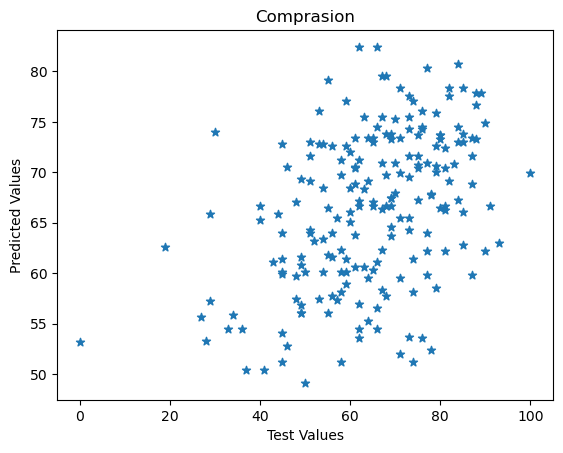

In [55]:
#Visulization
import matplotlib.pyplot as plt
plt.scatter(y_test , y_pred , marker = '*')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Comprasion')